In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [ ]:
gold_df=pd.read_csv("/content/gld_price_data.csv")

In [ ]:
gold_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_df.shape

(2290, 6)

In [ ]:
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
gold_df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


Finding the correlation

In [ ]:
import pandas as pd

# Assuming 'Date' is the column with date strings
gold_df['Date'] = pd.to_datetime(gold_df['Date'])  # Convert to datetime objects

# Extract numerical features from the date if needed
gold_df['Year'] = gold_df['Date'].dt.year
gold_df['Month'] = gold_df['Date'].dt.month
gold_df['Day'] = gold_df['Date'].dt.day

# Now calculate correlation, excluding the original 'Date' column
correlation = gold_df.drop('Date', axis=1).corr()
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD      Year     Month  \
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017  0.944403 -0.023432   
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375  0.206654  0.020494   
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317 -0.775765 -0.047335   
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631 -0.172485 -0.011976   
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000 -0.791655 -0.012100   
Year     0.944403  0.206654 -0.775765 -0.172485 -0.791655  1.000000 -0.070903   
Month   -0.023432  0.020494 -0.047335 -0.011976 -0.012100 -0.070903  1.000000   
Day     -0.001525 -0.000198 -0.007988 -0.000206  0.002122 -0.006307  0.005550   

              Day  
SPX     -0.001525  
GLD     -0.000198  
USO     -0.007988  
SLV     -0.000206  
EUR/USD  0.002122  
Year    -0.006307  
Month    0.005550  
Day      1.000000  


In [ ]:
correlation=gold_df.corr()

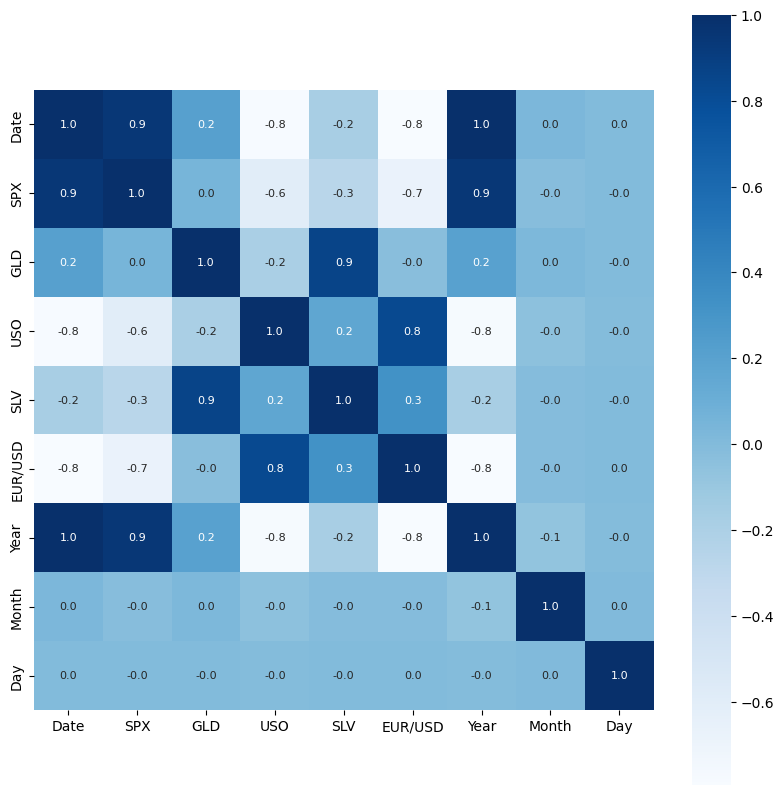

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

plt.show()

negative correlation have negative values and positive

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Year       0.206654
Month      0.020494
Day       -0.000198
Name: GLD, dtype: float64


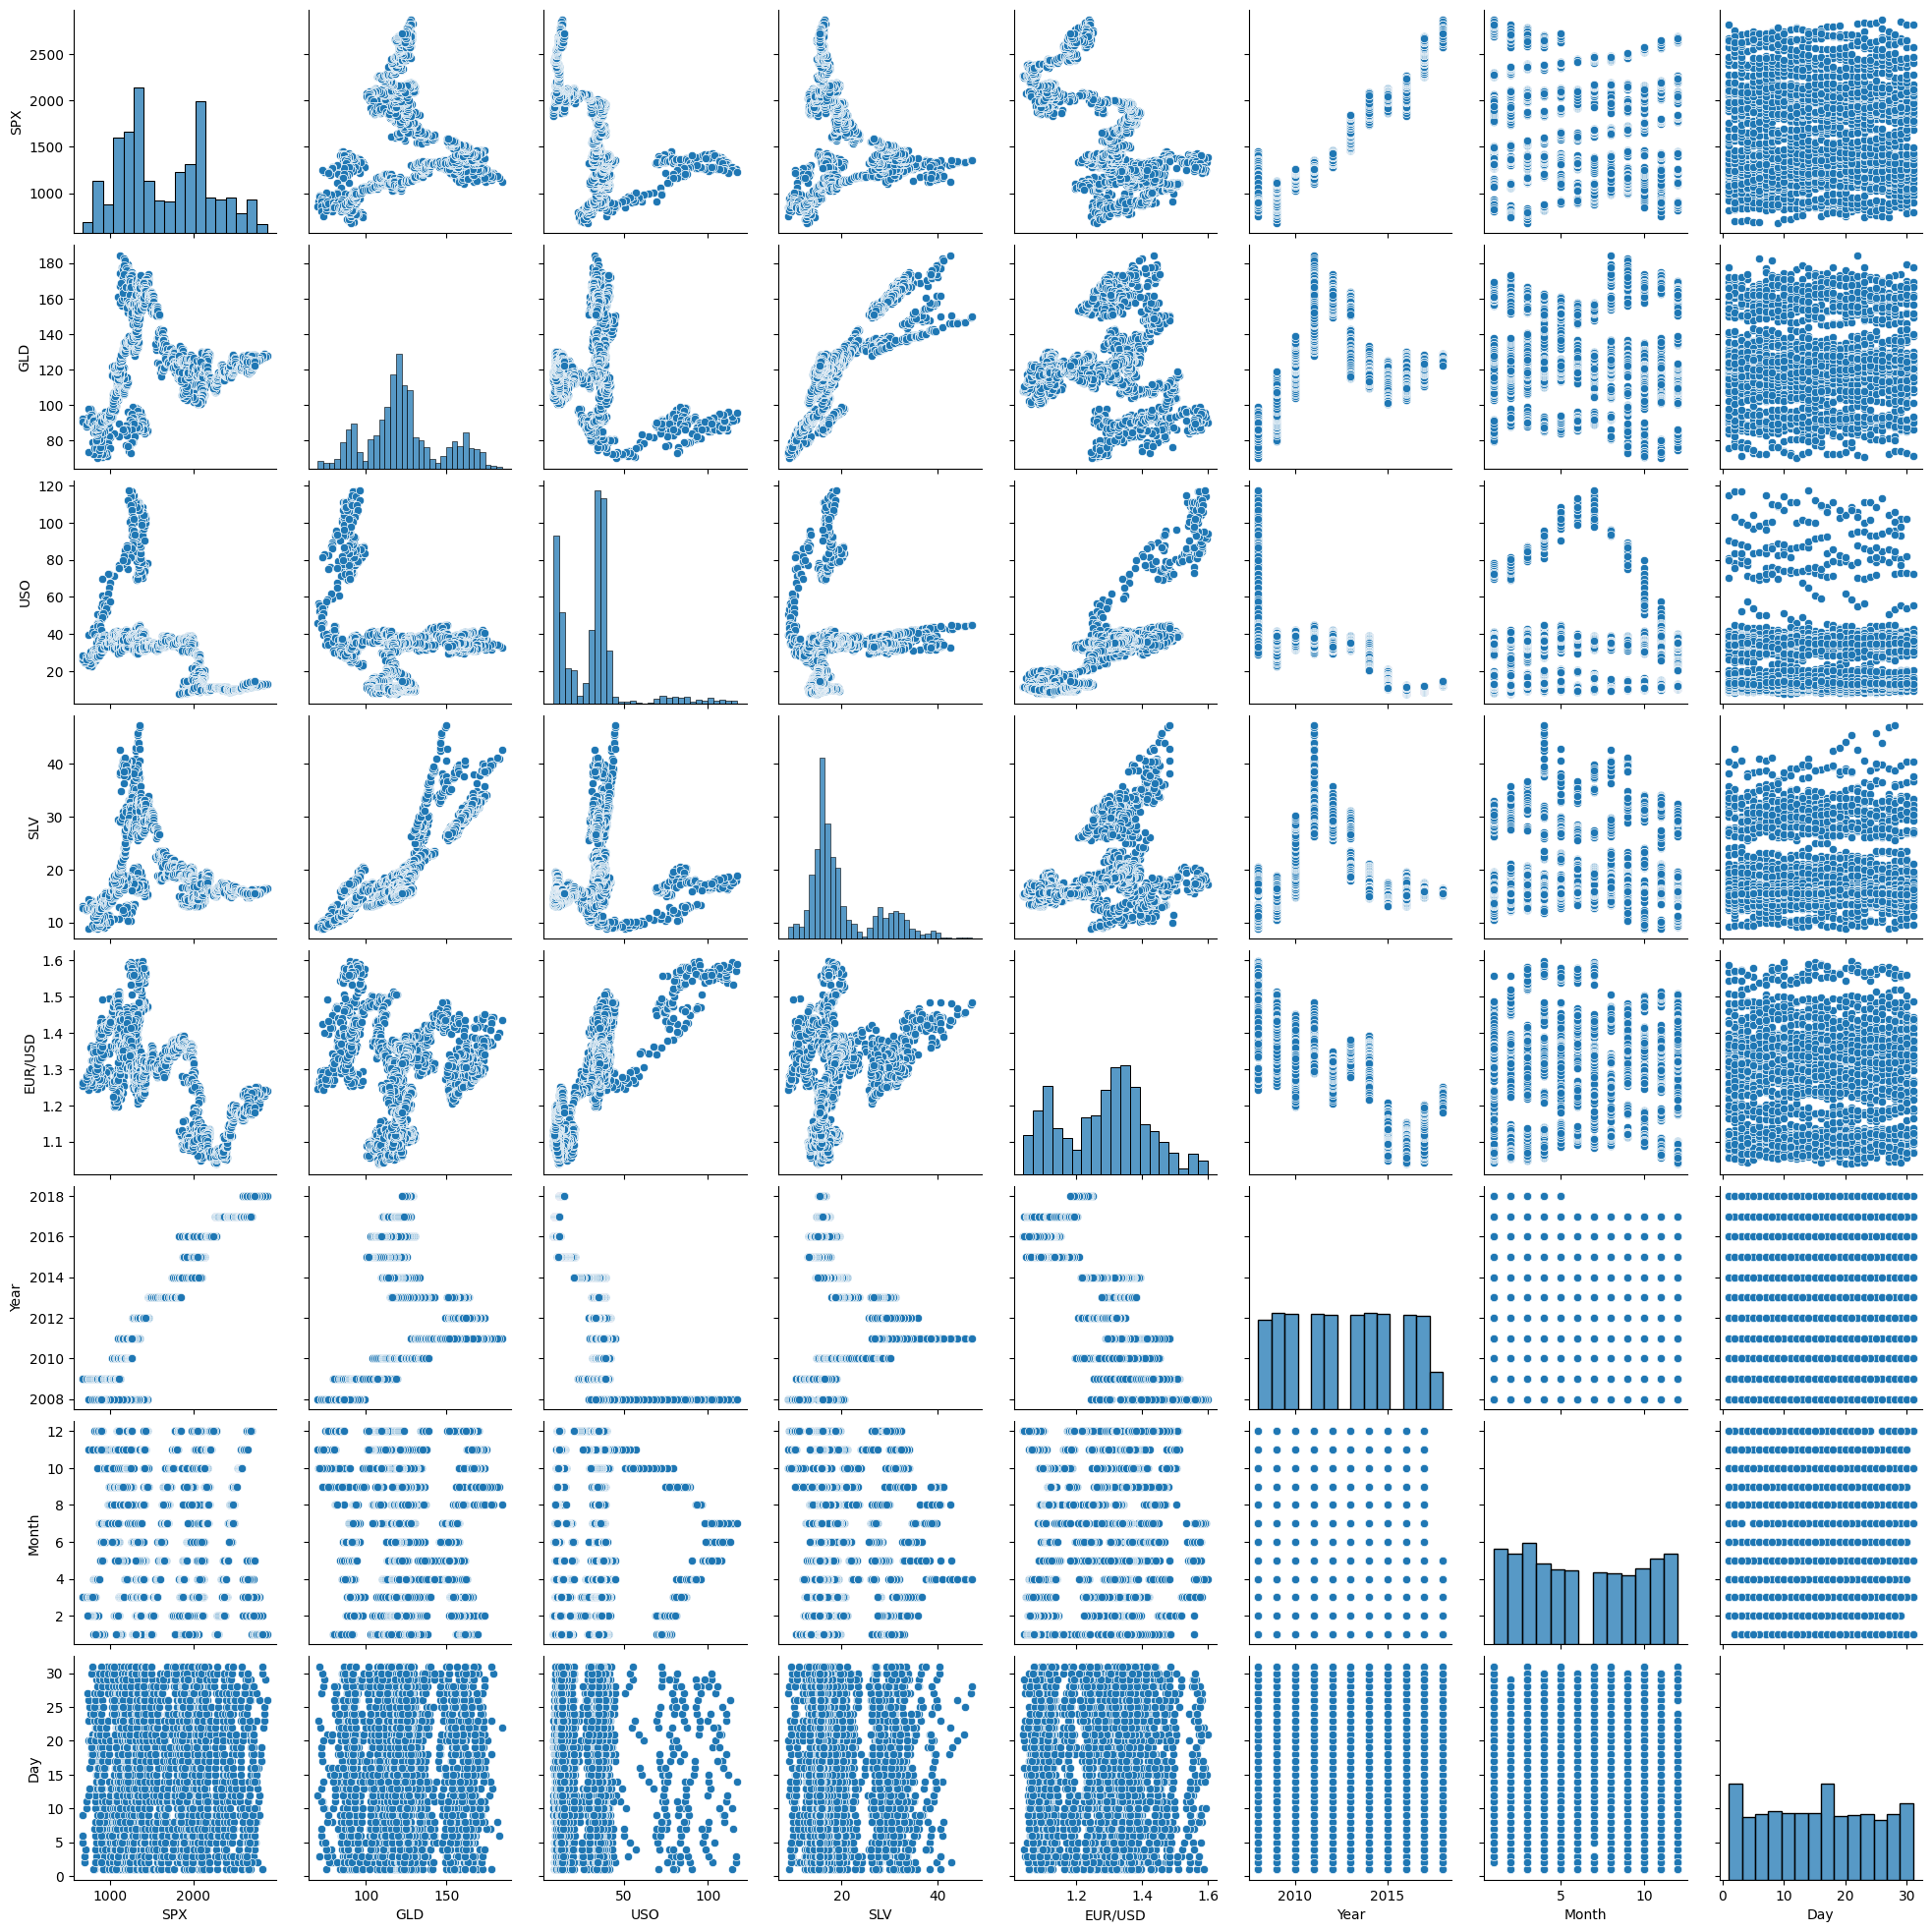

In [ ]:
sns.pairplot(gold_df)

<ipython-input-15-695496f9f425>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_df['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

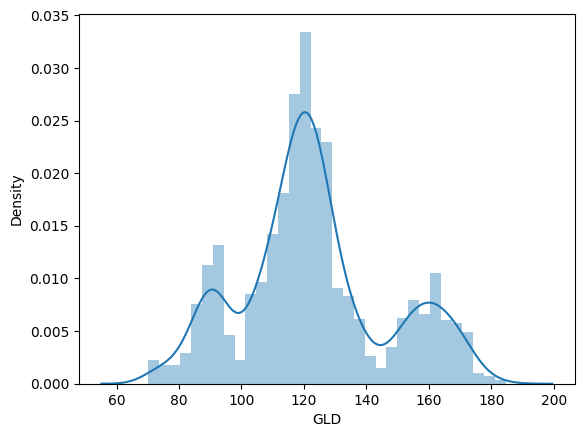

In [ ]:
sns.distplot(gold_df['GLD'])

splitting the features and the target

In [ ]:
X = gold_df.drop(['Date','GLD'],axis=1)
Y = gold_df['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD  Year  Month  Day
0     1447.160034  78.470001  15.1800  1.471692  2008      1    2
1     1447.160034  78.370003  15.2850  1.474491  2008      1    3
2     1411.630005  77.309998  15.1670  1.475492  2008      1    4
3     1416.180054  75.500000  15.0530  1.468299  2008      1    7
4     1390.189941  76.059998  15.5900  1.557099  2008      1    8
...           ...        ...      ...       ...   ...    ...  ...
2285  2671.919922  14.060000  15.5100  1.186789  2018      5    8
2286  2697.790039  14.370000  15.5300  1.184722  2018      5    9
2287  2723.070068  14.410000  15.7400  1.191753  2018      5   10
2288  2730.129883  14.380000  15.5600  1.193118  2018      5   14
2289  2725.780029  14.405800  15.4542  1.182033  2018      5   16

[2290 rows x 7 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into train and test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

model training

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
regressor=RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X_train,Y_train)#training the model on training set


RandomForestRegressor(n_estimators=10, random_state=0)

Model evaluation

In [ ]:
#prediction on test data
y_pred=regressor.predict(X_test)

In [ ]:
print(y_pred)

[168.0899994  83.2090005 116.2139994 127.455001  120.3530006 154.8519974
 149.5799988 126.038     117.6119986 126.0430017 115.8320016 171.3520006
 140.4170014 167.7379974 114.8110002 118.1590012 134.1360014 171.6770019
 159.8430053 173.9199983 154.8599993 123.4220001 177.3199996 157.3260037
 125.6700005  93.4899993  79.7569993 119.0510009 119.0159995 167.3929977
  87.3710008 125.3759996  90.4509996 117.4879998 121.3639999 135.875
 115.3700013 113.5460007 142.6450012 107.7960012 105.1240031  87.1729972
 126.9810014 117.3099998 154.065001  120.4789986 108.1849998 107.8049973
  92.7879998 127.2359972  77.1159993 114.076001  120.4339989 110.7459993
 118.7169992 121.0559974 159.8790008 170.9059996 145.8289964  86.8779998
  94.0419999  87.2689979  90.0989997 118.962001  126.3370002 127.7679991
 170.0410002 122.061     117.2679999  97.4060005 168.5770004 141.8189959
 132.8370011 120.6200014 123.1979988 119.5790009 113.8670023 117.8019999
 107.2510009 127.9820007 114.297999  106.3960013 117.24

R squared error

In [ ]:
score=r2_score(Y_test,y_pred)
print(score)

0.9946487018354119


Compare test values and predicted values

In [ ]:
Y_test=list(Y_test)

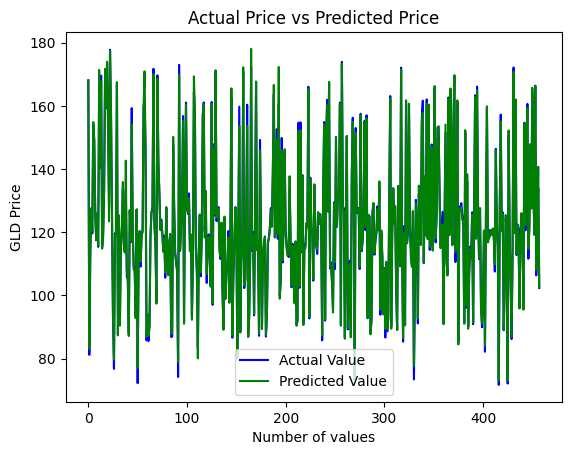

In [ ]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(y_pred,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()